### <h1 style="color:teal;font-family:cambria;font-size:43px;"   align=center >Handwritten digit Recognition : CNN </h1>
#  
**Overview:**

Our project focuses on developing a CNN model for digit recognition using the MNIST dataset. The model is designed to classify handwritten digits from 0 to 9. 

**Key Steps:**
1. **Data Preprocessing:** The project involves preprocessing the MNIST dataset, including normalizing pixel values, reshaping images, and converting labels to one-hot encoded vectors.
   
2. **Model Architecture:** A CNN architecture is constructed using Conv2D and MaxPooling2D layers for feature extraction, followed by Dense layers for classification. The model is compiled with categorical cross-entropy loss and the Adam optimizer.
   
3. **Training and Evaluation:** The model is trained on the training data and evaluated on the test data to assess its performance. Training metrics such as accuracy and loss are monitored over epochs.

4. **Visualization:** The project includes visualizations of training and validation accuracy, as well as example predictions to showcase the model's performance on individual images.

5. **Single Image Prediction:** A functionality is implemented to predict a single digit from a user-provided image. The image is preprocessed, resized, and fed into the trained model for prediction.

**Outcome:**
The project aims to build an accurate and reliable CNN model for digit recognition, demonstrating proficiency in image classification tasks and providing a user-friendly interface for predicting digits from input images.

In [22]:
import numpy as np
from tensorflow.keras.datasets import mnist

# Load the MNIST dataset from a local path
(X_train, y_train), (X_test, y_test) = mnist.load_data()

we can use mnist dataset by directly using this load_data() method which shows like this :
* Downloading data from https://storage.googleapis.com/tensorflow/tf-keras-datasets/mnist.npz

or If we dont have an internet connection we can proceed if we have a mnist dataset locally and we can proceed by giving the path as perameter to load_data() method like this :
* mnist.load_data(path="C:\\Users\\.....")

In [23]:

# Reshape the training and test data to have a single channel
X_train = np.reshape(X_train, (X_train.shape[0], 28, 28, 1))
X_test = np.reshape(X_test, (X_test.shape[0], 28, 28, 1))
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


* The reshaping of the training and test data to have a single channel with dimensions (28, 28, 1) is done to prepare the image data for processing by deep learning models like Convolutional Neural Networks (CNNs).
* This reshaping indicates that the images are grayscale, with each image represented as a 28x28 grid with a single channel for intensity values.
* By reshaping the data in this way, it ensures compatibility with the architecture of neural networks and allows for effective feature extraction from the images.

In [24]:

from tensorflow.keras.utils import to_categorical
# Normalize the pixel values to be between 0 and 1
X_train = X_train / 255.0
X_test = X_test / 255.0

# Convert the labels to one-hot encoded vectors
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


* The pixel values of the training and test data are normalized to be between 0 and 1 by dividing each pixel value by 255.
* This normalization process is crucial for deep learning models, as it helps in standardizing the input data and ensuring that all features have a similar scale.
* By normalizing the pixel values, the model can learn more effectively and converge faster during training.

In [25]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Sequential
# Define the CNN architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))


**Convolutional Layers (Conv2D)**:
* The model architecture includes Conv2D layers, which are convolutional layers that apply a set of filters to the input image to extract features.
* The first Conv2D layer with 32 filters and a kernel size of (3, 3) uses the ReLU activation function and takes input images of size (28, 28, 1).
* Subsequent Conv2D layers with 64 filters and the same activation function further extract hierarchical features from the input data.

**MaxPooling Layers (MaxPooling2D)**:
* MaxPooling2D layers follow the Conv2D layers and perform downsampling by selecting the maximum value from a set of values in a specific region.
* These layers help in reducing the spatial dimensions of the feature maps while retaining the most important information.

**Flatten Layer**:
* The Flatten layer is used to flatten the 2D output from the convolutional layers into a 1D array, preparing the data for input to the dense layers.
* This step is essential to transition from the convolutional part of the network to the fully connected part.

**Dense Layers (Fully Connected Layers)**:
* Dense layers are fully connected layers that process the flattened features from the convolutional layers.
* The model includes Dense layers with 64 units and ReLU activation to learn complex patterns in the data.
* The final Dense layer with 10 units and softmax activation is used for multi-class classification, providing probabilities for each class.

**Sequential Model**:
* The Sequential model is a linear stack of layers that defines the architecture of the neural network.
* Layers are added sequentially to the model, defining the flow of data through the network from input to output.
* This model architecture is commonly used for building deep learning models in a straightforward and sequential manner.

In [27]:

# Compile the model with categorical cross-entropy loss and Adam optimizer
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model with the training data and validate with the test data
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))


Epoch 1/5
938/938 [==============================] - 25s 25ms/step - loss: 0.1767 - accuracy: 0.9474 - val_loss: 0.0509 - val_accuracy: 0.9826
Epoch 2/5
938/938 [==============================] - 23s 24ms/step - loss: 0.0498 - accuracy: 0.9844 - val_loss: 0.0374 - val_accuracy: 0.9883
Epoch 3/5
938/938 [==============================] - 23s 24ms/step - loss: 0.0359 - accuracy: 0.9890 - val_loss: 0.0336 - val_accuracy: 0.9886
Epoch 4/5
938/938 [==============================] - 21s 23ms/step - loss: 0.0273 - accuracy: 0.9910 - val_loss: 0.0299 - val_accuracy: 0.9906
Epoch 5/5
938/938 [==============================] - 21s 22ms/step - loss: 0.0219 - accuracy: 0.9926 - val_loss: 0.0351 - val_accuracy: 0.9895


* Compile the Model: The model is compiled with categorical cross-entropy loss, Adam optimizer, and accuracy metric.
* Training the Model: it is trained for 5 epochs with a batch size of 64, and its performance is evaluated on the test data.

In [28]:

# Evaluate the trained model on the test data
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)


313/313 [==============================] - 3s 9ms/step - loss: 0.0351 - accuracy: 0.9895
Test accuracy: 0.9894999861717224


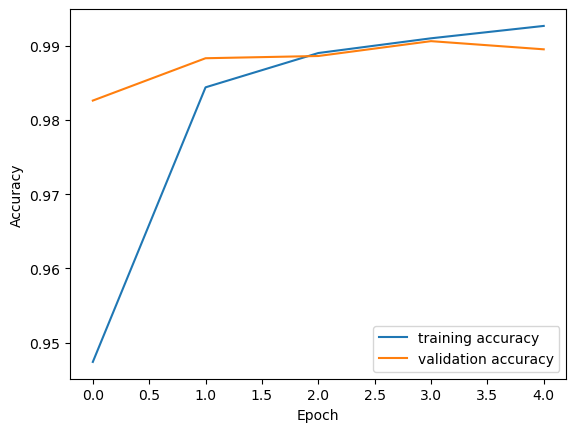

In [29]:
import matplotlib.pyplot as plt

# Plot the training and validation accuracy over epochs
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

Here the plot allows visualizing the model's accuracy on the training and validation datasets across different epochs, providing insights into the model's learning progress and potential overfitting or underfitting.

1/1 [==============================] - 0s 28ms/step


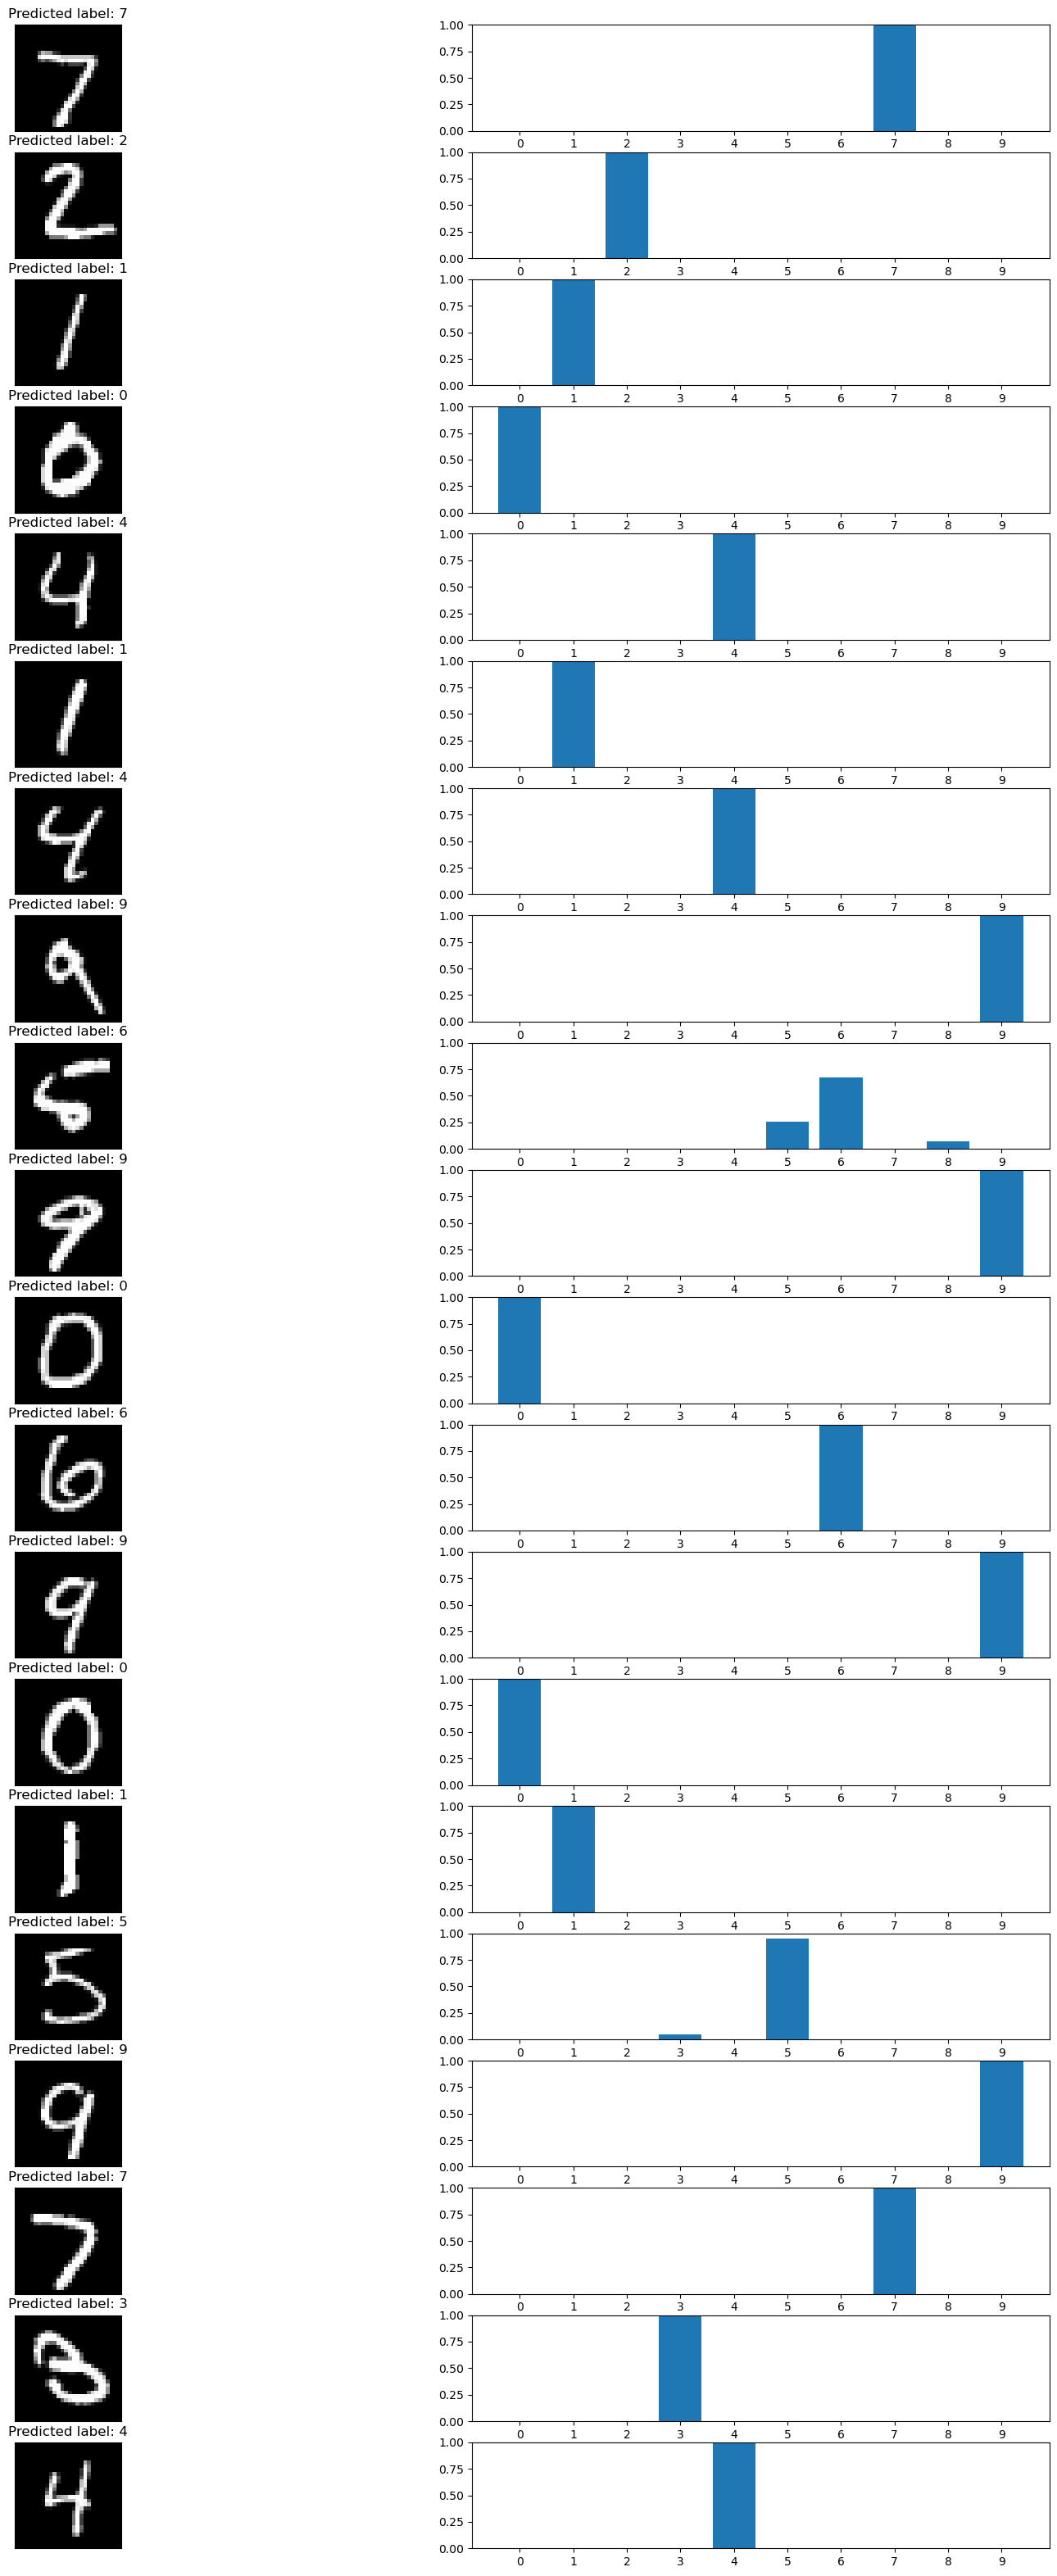

In [30]:
# Plot some example predictions
num_examples = 20
fig, axes = plt.subplots(nrows=num_examples, ncols=2, figsize=(20, 40))
for i in range(num_examples):
    # Make a prediction
    prediction = model.predict(X_test[i:i+1])[0]
    predicted_label = np.argmax(prediction)
    # Plot the image and the predicted label
    axes[i, 0].imshow(X_test[i].reshape(28, 28), cmap='gray')
    axes[i, 0].set_xticks([])
    axes[i, 0].set_yticks([])
    axes[i, 0].set_title(f'Predicted label: {predicted_label}')
    # Plot the predicted probabilities for each class
    axes[i, 1].bar(x=range(10), height=prediction)
    axes[i, 1].set_xticks(range(10))
    axes[i, 1].set_ylim([0, 1])
plt.show()

Now we can test this model by taking the external inputs to our model:
* to test the input to this model we can take an image which has completely black background with thick white colored numbers on it .
* Here we can take either a normal image i.e a screenshot with extinsion png or jpg or any other picture format or we can take an input directly using our systems gui like in this video: https://media.geeksforgeeks.org/wp-content/uploads/20210720153411/Handwritten-digit-recognition-2021-07-20-15-26-08_Trim.mp4?_=1
* But any input can be taken by the model if that input is a valid input . so inorder to get a correct prediction we need to change our image to the similar image which was our model is trained on . 
* Here we need to preprocss the image by resizing into 28x28 pixels in a 2d image and sent to the model and finally it can predict the actual number 


In [36]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
#preprocessing the image
def preprocess_image(image):
    image = cv2.resize(image, (28, 28))
    
    # Normalize the image
    image = image / 255.0
    
    # Expand dimensions to make it 4-dimensional
    image = np.expand_dims(image, axis=-1)
    image = np.expand_dims(image, axis=0)
    
    return image

In [37]:
#predicting the number
def predict_number(model, image):
    # Preprocess the image
    image = preprocess_image(image)
    
    # Predict the number
    prediction = model.predict(image)[0]
    
    # Get the predicted class
    predicted_number = np.argmax(prediction)
    
    return predicted_number

1/1 [==============================] - 0s 33ms/step


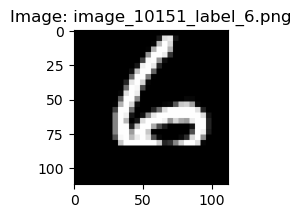

The predicted number in image_10151_label_6.png is: 6
1/1 [==============================] - 0s 96ms/step


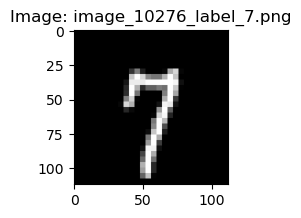

The predicted number in image_10276_label_7.png is: 7
1/1 [==============================] - 0s 32ms/step


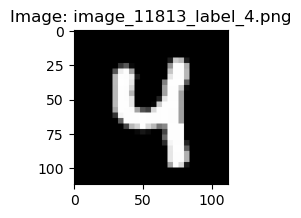

The predicted number in image_11813_label_4.png is: 4
1/1 [==============================] - 0s 33ms/step


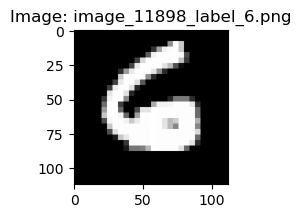

The predicted number in image_11898_label_6.png is: 6
1/1 [==============================] - 0s 33ms/step


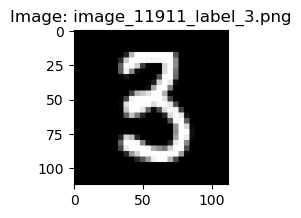

The predicted number in image_11911_label_3.png is: 3
1/1 [==============================] - 0s 30ms/step


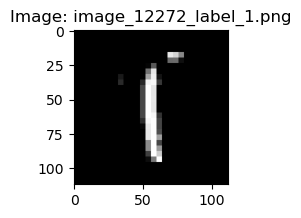

The predicted number in image_12272_label_1.png is: 1
1/1 [==============================] - 0s 32ms/step


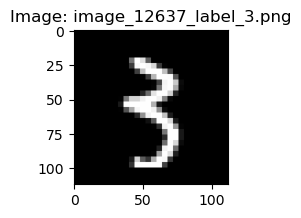

The predicted number in image_12637_label_3.png is: 3
1/1 [==============================] - 0s 30ms/step


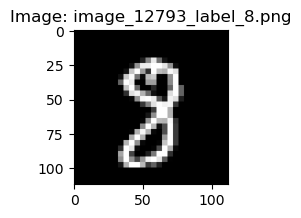

The predicted number in image_12793_label_8.png is: 8
1/1 [==============================] - 0s 74ms/step


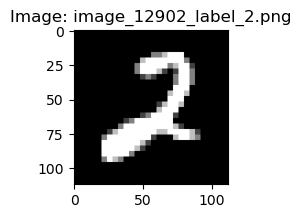

The predicted number in image_12902_label_2.png is: 2
1/1 [==============================] - 0s 31ms/step


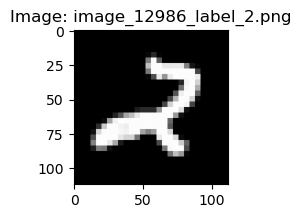

The predicted number in image_12986_label_2.png is: 2
1/1 [==============================] - 0s 35ms/step


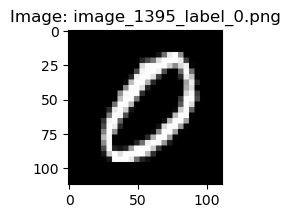

The predicted number in image_1395_label_0.png is: 0
1/1 [==============================] - 0s 31ms/step


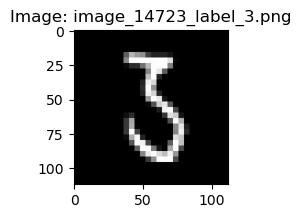

The predicted number in image_14723_label_3.png is: 3
1/1 [==============================] - 0s 29ms/step


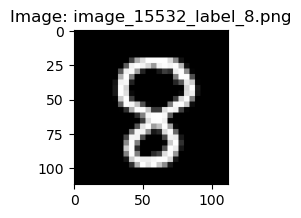

The predicted number in image_15532_label_8.png is: 8
1/1 [==============================] - 0s 28ms/step


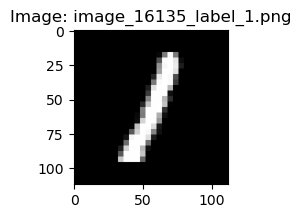

The predicted number in image_16135_label_1.png is: 1
1/1 [==============================] - 0s 29ms/step


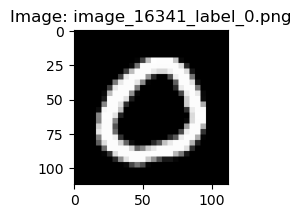

The predicted number in image_16341_label_0.png is: 0
1/1 [==============================] - 0s 28ms/step


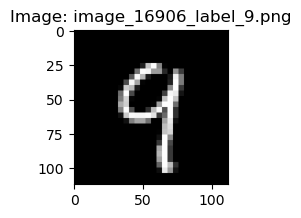

The predicted number in image_16906_label_9.png is: 9
1/1 [==============================] - 0s 31ms/step


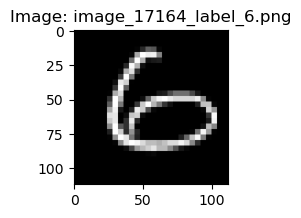

The predicted number in image_17164_label_6.png is: 6
1/1 [==============================] - 0s 32ms/step


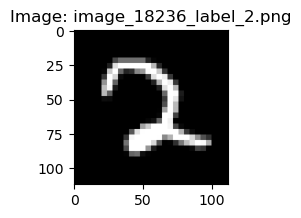

The predicted number in image_18236_label_2.png is: 2
1/1 [==============================] - 0s 28ms/step


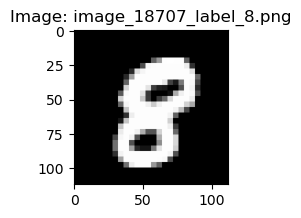

The predicted number in image_18707_label_8.png is: 8
1/1 [==============================] - 0s 28ms/step


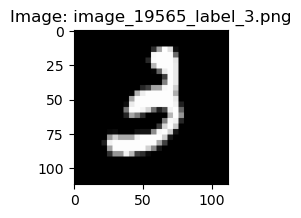

The predicted number in image_19565_label_3.png is: 3
1/1 [==============================] - 0s 80ms/step


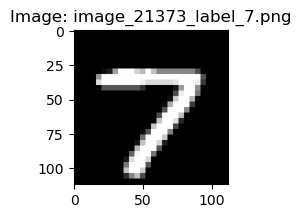

The predicted number in image_21373_label_7.png is: 7
1/1 [==============================] - 0s 32ms/step


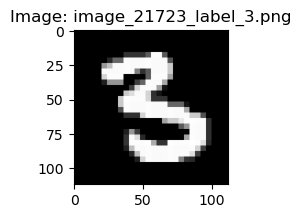

The predicted number in image_21723_label_3.png is: 3
1/1 [==============================] - 0s 32ms/step


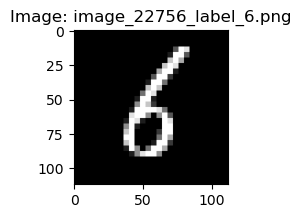

The predicted number in image_22756_label_6.png is: 6
1/1 [==============================] - 0s 32ms/step


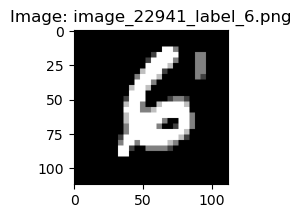

The predicted number in image_22941_label_6.png is: 6
1/1 [==============================] - 0s 33ms/step


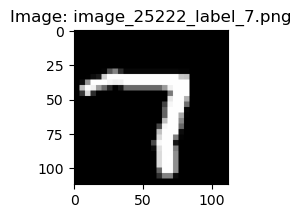

The predicted number in image_25222_label_7.png is: 7
1/1 [==============================] - 0s 32ms/step


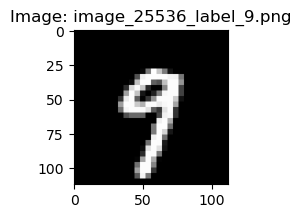

The predicted number in image_25536_label_9.png is: 9
1/1 [==============================] - 0s 33ms/step


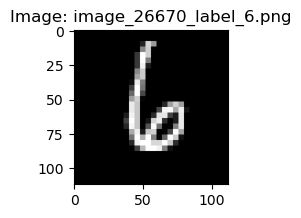

The predicted number in image_26670_label_6.png is: 6
1/1 [==============================] - 0s 33ms/step


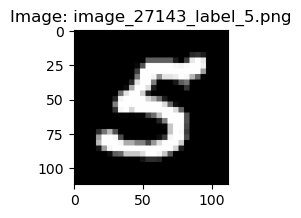

The predicted number in image_27143_label_5.png is: 5
1/1 [==============================] - 0s 32ms/step


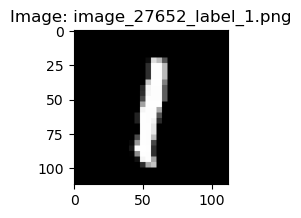

The predicted number in image_27652_label_1.png is: 1
1/1 [==============================] - 0s 32ms/step


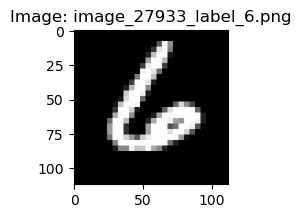

The predicted number in image_27933_label_6.png is: 6
1/1 [==============================] - 0s 49ms/step


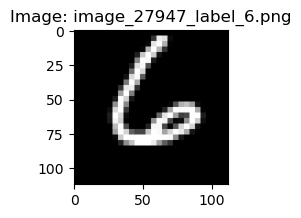

The predicted number in image_27947_label_6.png is: 6
1/1 [==============================] - 0s 31ms/step


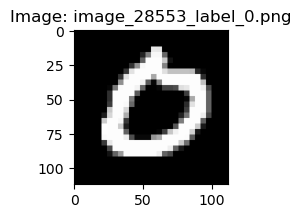

The predicted number in image_28553_label_0.png is: 0
1/1 [==============================] - 0s 30ms/step


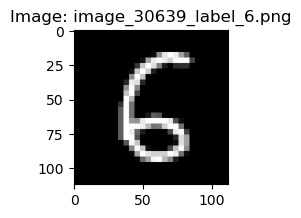

The predicted number in image_30639_label_6.png is: 6
1/1 [==============================] - 0s 32ms/step


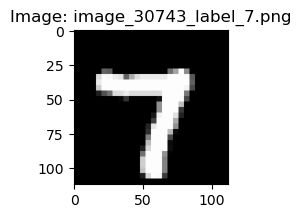

The predicted number in image_30743_label_7.png is: 7
1/1 [==============================] - 0s 68ms/step


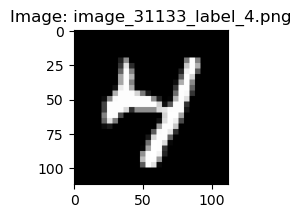

The predicted number in image_31133_label_4.png is: 4
1/1 [==============================] - 0s 30ms/step


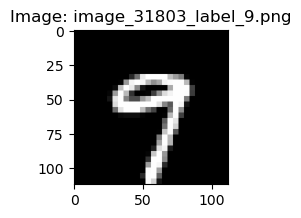

The predicted number in image_31803_label_9.png is: 9
1/1 [==============================] - 0s 29ms/step


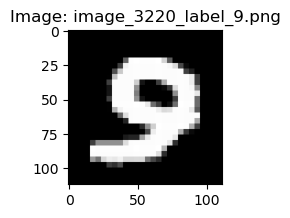

The predicted number in image_3220_label_9.png is: 9
1/1 [==============================] - 0s 31ms/step


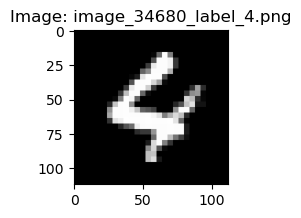

The predicted number in image_34680_label_4.png is: 4
1/1 [==============================] - 0s 28ms/step


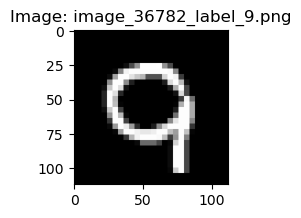

The predicted number in image_36782_label_9.png is: 9
1/1 [==============================] - 0s 32ms/step


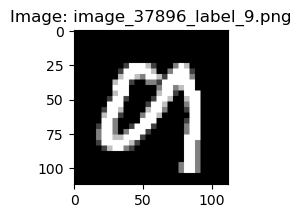

The predicted number in image_37896_label_9.png is: 9
1/1 [==============================] - 0s 31ms/step


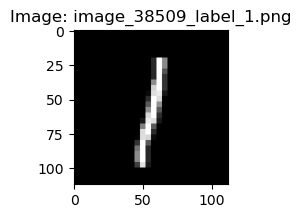

The predicted number in image_38509_label_1.png is: 1
1/1 [==============================] - 0s 30ms/step


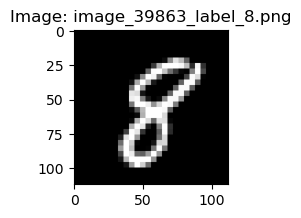

The predicted number in image_39863_label_8.png is: 8
1/1 [==============================] - 0s 33ms/step


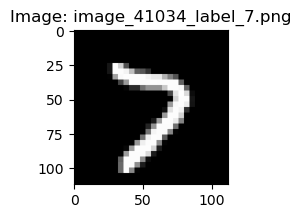

The predicted number in image_41034_label_7.png is: 7
1/1 [==============================] - 0s 29ms/step


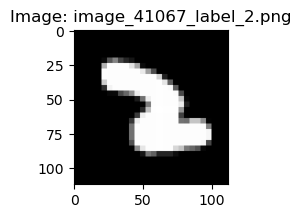

The predicted number in image_41067_label_2.png is: 2
1/1 [==============================] - 0s 28ms/step


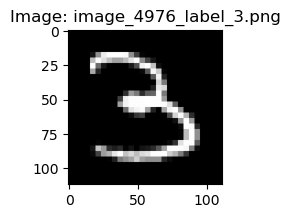

The predicted number in image_4976_label_3.png is: 3
1/1 [==============================] - 0s 44ms/step


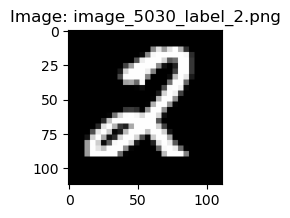

The predicted number in image_5030_label_2.png is: 2
1/1 [==============================] - 0s 27ms/step


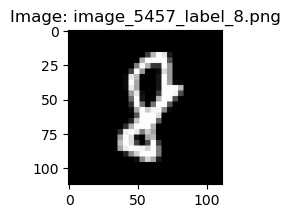

The predicted number in image_5457_label_8.png is: 8
1/1 [==============================] - 0s 27ms/step


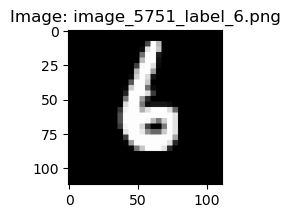

The predicted number in image_5751_label_6.png is: 6
1/1 [==============================] - 0s 32ms/step


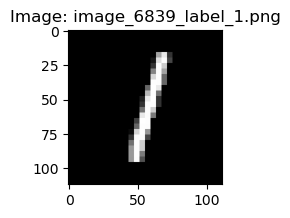

The predicted number in image_6839_label_1.png is: 1
1/1 [==============================] - 0s 28ms/step


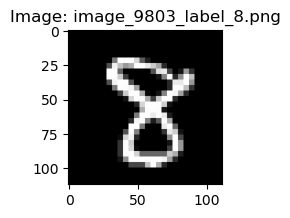

The predicted number in image_9803_label_8.png is: 8
1/1 [==============================] - 0s 24ms/step


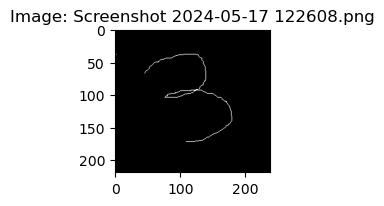

The predicted number in Screenshot 2024-05-17 122608.png is: 3
1/1 [==============================] - 0s 27ms/step


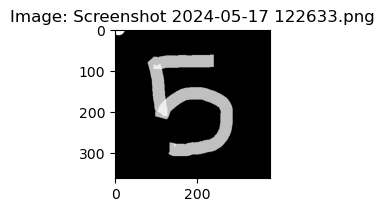

The predicted number in Screenshot 2024-05-17 122633.png is: 5


In [39]:
#iterate through all the files in our directory and sending to the model
def main(image_dir, model):
    # Loop through each image in the directory
    for filename in os.listdir(image_dir):
        if filename.endswith('.jpg') or filename.endswith('.png'):
            # Load the image
            image_path = os.path.join(image_dir, filename)
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
            
            # Predict the number in the image
            predicted_number = predict_number(model, image)
            
            # Display the original image
            plt.figure(figsize=(2, 2))
            plt.imshow(image, cmap='gray')
            plt.title(f'Image: {filename}')
            plt.show()
            
            # Print the predicted number
            print(f'The predicted number in {filename} is: {predicted_number}')

if __name__ == '__main__':
    # Set the directory containing the images
    image_dir = r"digits"
   
    # Call the main function
    main(image_dir, model)

1/1 [==============================] - 0s 33ms/step


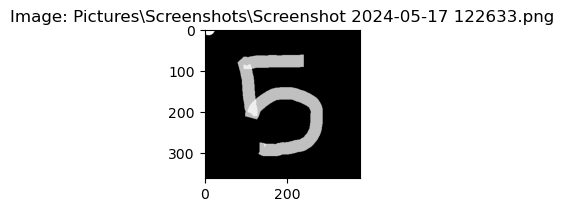

The predicted number in Pictures\Screenshots\Screenshot 2024-05-17 122633.png is: 5


In [45]:

# Load and preprocess the image
image_path = r"Pictures\Screenshots\Screenshot 2024-05-17 122633.png"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Predict the number
predicted_number = predict_number(model, image)

# Display the image and prediction
plt.figure(figsize=(2, 2))
plt.imshow(image, cmap='gray')
plt.title(f'Image: {image_path}')
plt.show()

print(f'The predicted number in {image_path} is: {predicted_number}')